In [2]:
import pandas as pd
df=pd.read_csv("model_data.csv")
print(df)

    Route Number                     Source                Destination  \
0              1             Singapore Port              Shanghai Port   
1              2              Shanghai Port             Singapore Port   
2              3             Singapore Port              Malaysia Port   
3              4              Malaysia Port             Singapore Port   
4              5              Shanghai Port              Malaysia Port   
5              6              Malaysia Port              Shanghai Port   
6              7              Shanghai Port                  Wuxi Port   
7              8                  Wuxi Port              Shanghai Port   
8              9          Singapore Airport           Shanghai Airport   
9             10           Shanghai Airport          Singapore Airport   
10            11          Singapore Airport           Malaysia Airport   
11            12           Malaysia Airport          Singapore Airport   
12            13           Shanghai Ai

4.724371691967772 531.3083664514581 2.570263213968703


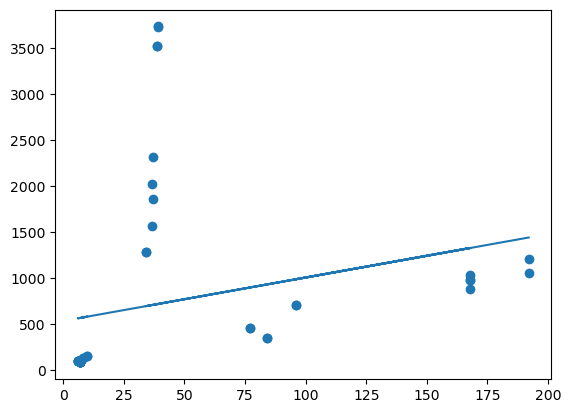

0     2640.787731
1     2489.437731
2     1684.848049
3     1685.548049
4     2355.002811
5     2206.762811
6     1345.084987
7     1345.084987
8     3015.720119
9     2562.965119
10    1976.937004
11    1978.222004
12    2718.747933
13    2271.877933
14    4448.008862
15    4444.283862
16    4235.226677
17    4228.196677
18    1273.155589
19    1273.155589
20    2305.002811
21    2305.982811
22     659.654597
23     659.654597
24     659.654597
25     659.654597
26     659.654597
27     659.654597
28     644.378968
29     644.378968
30     644.378968
31     644.378968
32     644.378968
33     644.378968
34     644.378968
35     644.378968
36     644.378968
37     644.378968
38     644.378968
39     664.378968
40     664.378968
41     664.378968
42     664.378968
43     664.378968
44     664.378968
45     664.378968
46     728.552083
47     728.702083
48     694.103340
49     694.103340
dtype: float64


In [6]:
cost=df['Fixed Freight Cost']+df['Port/Airport/Rail Handling Cost']+df['Bunker/ Fuel Cost']+df['Documentation Cost']+df['Equipment Cost']+df['Extra Cost']
cost+=df['Transit Duty']*cost
#print(cost)
time=df['CustomClearance time (hours)']+df['Port/Airport/Rail Handling time (hours)']+df['Extra Time']+df['Transit time (hours)']
# print(time)
from scipy import stats
import matplotlib.pyplot as plt
slope, intercept, r, p, std_err = stats.linregress(time,cost)
print(slope,intercept,std_err)
plt.scatter(time,cost)
k=slope*time+intercept
plt.plot(time,k)
plt.show()
cost_fun=(cost+k)
print(cost_fun)

In [7]:
d={}
n=len(df)
j=0
for i in range(0,n):
    if df['Source'][i] not in d:
        d[df['Source'][i]]=[]
    l=[df['Destination'][i],int(cost_fun[i])]
    d[df['Source'][i]].append(l)
print(d)

{'Singapore Port': [['Shanghai Port', 2640], ['Malaysia Port', 1684], ['Singapore Warehouse', 659]], 'Shanghai Port': [['Singapore Port', 2489], ['Malaysia Port', 2355], ['Wuxi Port', 1345], ['Shanghai Warehouse', 664]], 'Malaysia Port': [['Singapore Port', 1685], ['Shanghai Port', 2206], ['Malaysia Warehouse', 644]], 'Wuxi Port': [['Shanghai Port', 1345], ['Wuxi Warehouse', 644]], 'Singapore Airport': [['Shanghai Airport', 3015], ['Malaysia Airport', 1976], ['Wuxi Airport', 4448], ['Singapore Warehouse', 659]], 'Shanghai Airport': [['Singapore Airport', 2562], ['Malaysia Airport', 2718], ['Shanghai Warehouse', 664]], 'Malaysia Airport': [['Singapore Airport', 1978], ['Shanghai Airport', 2271], ['Wuxi Airport', 4235], ['Malaysia Warehouse', 644]], 'Wuxi Airport': [['Singapore Airport', 4444], ['Malaysia Airport', 4228], ['Wuxi Warehouse', 644]], 'Shanghai Railway Station': [['Wuxi Railway Station', 1273], ['Shanghai Warehouse', 664]], 'Wuxi Railway Station': [['Shanghai Railway Station

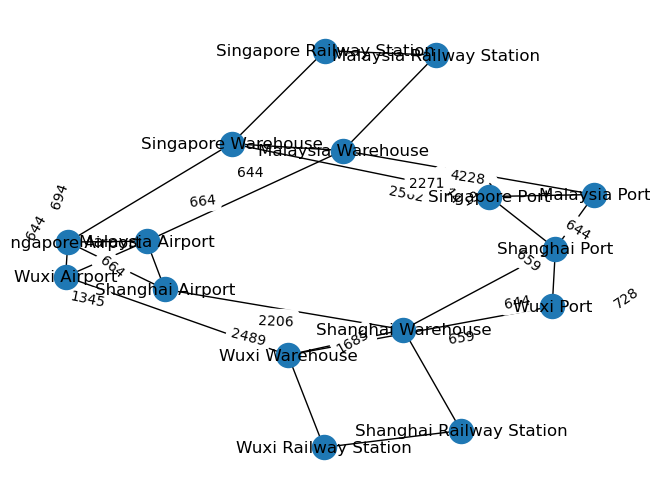

[['Singapore Railway Station', 2305], ['Malaysia Warehouse', 644]]


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
for i in d:
    for j in d[i]:
        G.add_edge(i,j[0],weight=j[1])
# Draw the graph
nx.draw(G, with_labels=True)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G), edge_labels=edge_labels)

# Display the plot
plt.show()
print(d['Malaysia Railway Station'])

In [17]:
import math
des="Singapore Airport"
d1={}
d1[des]=0
def assign_husristic_val(d,des,val):
    for i in d[des]:
        if i[0] not in d1:
            d1[i[0]]=math.sqrt(i[1]+val)
            assign_husristic_val(d,i[0],d1[i[0]])
assign_husristic_val(d,des,0)
for i in d:
    if i not in d1:
        d1[i]=float(inf)
print(d1)

{'Singapore Airport': 0, 'Shanghai Airport': 54.909015653169384, 'Malaysia Airport': 52.65841827906692, 'Wuxi Airport': 65.48021394497017, 'Wuxi Warehouse': 26.636069791637244, 'Wuxi Port': 25.896642056290567, 'Shanghai Port': 37.025621427010385, 'Singapore Port': 50.259582384128606, 'Malaysia Port': 41.64444239492382, 'Malaysia Warehouse': 26.184813201451785, 'Malaysia Railway Station': 25.88792794337646, 'Singapore Railway Station': 48.279270167882366, 'Singapore Warehouse': 26.594722599942312, 'Shanghai Warehouse': 26.47688843929759, 'Shanghai Railway Station': 26.276926921527515, 'Wuxi Railway Station': 36.04548414047906}


In [19]:
source="Wuxi Railway Station"
from queue import PriorityQueue

def astar_search(graph, start, goal,h):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    cost_so_far = {start: 0}

    while not open_set.empty():
        current = open_set.get()[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # Return reversed path

        for neighbor, cost in graph[current]:
            new_cost = cost_so_far[current] + cost
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + h[neighbor]
                open_set.put((priority, neighbor))
                came_from[neighbor] = current

    return None
# print(d)
path = astar_search(d,source,des,d1)
print(path)


['Wuxi Railway Station', 'Wuxi Warehouse', 'Shanghai Warehouse', 'Shanghai Airport', 'Singapore Airport']
